In [2]:
# Ejercicio 6
# Utiliza PyToch para crear y entrenar una red neuronal simple en un dataset de ejemplo (os lo dejo a vuestra decisión, podéis 
# buscar ejemplos o usar un asistente de código)

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


c:\tools\anaconda3\envs\session4\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Crear la red neuronal

# Transformaciones (por ejemplo, normalización)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Descargar el conjunto de datos MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                     download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                       shuffle=True, num_workers=2)

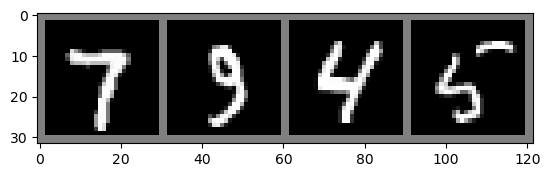

In [11]:
# Visualizar los datos el transform para ver el input de la red que queremos entrenar

# Obtener un batch de imágenes
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

images_grid = torchvision.utils.make_grid(images)

# Mostrar una imagen
import matplotlib.pyplot as plt
import numpy as np

# funciones para mostrar una imagen
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# mostrar imagenes
imshow(images_grid)

In [12]:
# Definir la red neuronal

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [14]:
# Funcion de perdida y optimizador

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

[1,  2000] loss: 0.833
[1,  4000] loss: 0.408
[1,  6000] loss: 0.314
[1,  8000] loss: 0.275
[1, 10000] loss: 0.246
[1, 12000] loss: 0.226
[1, 14000] loss: 0.207
[2,  2000] loss: 0.180
[2,  4000] loss: 0.154
[2,  6000] loss: 0.149
[2,  8000] loss: 0.152
[2, 10000] loss: 0.153
[2, 12000] loss: 0.141
[2, 14000] loss: 0.149
